In [1]:
#Import libraries
# Standard Packages
import pandas as pd
import numpy as np

# Viz Packages
import seaborn as sns
import matplotlib.pyplot as plt

# Scipy Stats
import scipy.stats as stats 

# Statsmodel Api
import statsmodels.api as sm
from statsmodels.formula.api import ols

# SKLearn Modules
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics

# Suppress future and deprecation warnings
import warnings
warnings.filterwarnings("ignore", category= FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
#Import housing data
kc_house_df = pd.read_csv('/Users/Aidan/Documents/Flatiron/Phase_2/King-County-House-Sales-/data/kc_house_data.csv')

kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


In [3]:
#Look at columns
kc_house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

In [4]:
#Looking at bedrooms
kc_house_df.bedrooms.value_counts()

3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

In [5]:
#Looking at rows where bedroom is zero. Looks like 0 is a placeholder for missing values.
kc_house_df[kc_house_df.bedrooms == 0].head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
573,3920030050,5/19/2022,930000.0,0,0.0,1617,2156,3.0,NO,NO,...,PUBLIC,2156,0,0,0,2009,0,"6019 Roosevelt Way Northeast, Seattle, Washing...",47.672700,-122.31781
1289,2768301406,3/2/2022,1090000.0,0,0.0,1500,1262,3.0,NO,NO,...,PUBLIC,1500,0,0,0,2021,0,"A, Leadwood, Missouri 63653, United States",37.859790,-90.58113
1310,3462800015,11/10/2021,360000.0,0,0.0,910,19000,1.0,NO,NO,...,PRIVATE,910,0,0,250,1946,0,"26125 79th Avenue South, Kent, Washington 9803...",47.366765,-122.23543
1952,2020069042,9/27/2021,399990.0,0,0.0,1677,43264,1.0,NO,NO,...,PUBLIC,1677,0,0,0,1969,0,"43407 212th Avenue Southeast, Enumclaw, Washin...",47.211660,-122.05920
2044,6896300047,9/17/2021,509000.0,0,1.0,400,2385,1.0,NO,NO,...,PUBLIC,400,0,0,0,1946,0,"8416 B Island Dr S, Seattle, Washington 98118,...",47.528030,-122.26129


Overview
A one-paragraph overview of the project, including the business problem, data, methods, results and recommendations.



Business Problem
Summary of the business problem you are trying to solve, and the data questions that you plan to answer to solve them.

Questions to consider:

Who are your stakeholders?
What are your stakeholders' pain points related to this project?
Why are your predictions important from a business perspective?


Data Understanding
Describe the data being used for this project.

- King County, WA housing data
    - min 4+ bedrooms (2 single parents and their kids)
    - near green space (greenbelt feature only has 773 yes)
    - nuisance =  No has ~ 25,000
    - 
- School district data?
- Crime statistics by zip code?

Questions to consider:

Where did the data come from, and how do they relate to the data analysis questions?
What do the data represent? Who is in the sample and what variables are included?
What is the target variable?
What are the properties of the variables you intend to use?

In [6]:
#Import data
schools_df = pd.read_csv('/Users/Aidan/Documents/Flatiron/Phase_2/King-County-House-Sales-/data/Report_Card_Assessment_Data_2021-22_School_Year.csv')

/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (11) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [7]:
fife_king_school_df = schools_df
fife_king_school_df[fife_king_school_df.DistrictName.str.contains("Fife")]

,SchoolYear,OrganizationLevel,County,ESDName,ESDOrganizationId,DistrictCode,DistrictName,DistrictOrganizationId,SchoolCode,SchoolName,...,Count of students expected to test including previously passed,CountMetStandard,PercentMetStandard,PercentLevel1,PercentLevel2,PercentLevel3,PercentLevel4,PercentMetTestedOnly,PercentNoScore,DataAsOf
2109,2021-22,District,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
2110,2021-22,District,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,NaN,District Total,...,228.0,20.0,8.8%,0.692982,0.206140,0.065789,0.021930,0.088889,0.013158,9/7/2022
2111,2021-22,District,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,NaN,District Total,...,1779.0,907.0,51.0%,0.245644,0.230467,0.310849,0.198988,0.517104,0.014053,9/7/2022
2112,2021-22,District,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,NaN,District Total,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
2113,2021-22,District,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,NaN,District Total,...,1042.0,612.0,58.7%,0.187140,0.212092,0.333013,0.254319,0.595331,0.013436,9/7/2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
758274,2021-22,School,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,5582.0,Fife Open Doors,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
758275,2021-22,School,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,5582.0,Fife Open Doors,...,15.0,3.0,20.0%,0.066667,0.200000,0.200000,0.000000,0.428571,0.533333,9/7/2022
758276,2021-22,School,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,5582.0,Fife Open Doors,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022
758277,2021-22,School,Pierce,Puget Sound Educational Service District 121,100006.0,27417.0,Fife School District,100088.0,5582.0,Fife Open Doors,...,NaN,NaN,Suppressed: N<10,NaN,NaN,NaN,NaN,NaN,NaN,9/7/2022


Technically Fife School District is in both Pierce and King counties. We are including it so that the King County houses with Zip Codes corresponding to the Fife School District can be included in our overall dataset.

In [8]:
king_school_df = schools_df[(schools_df.County == "King") | (schools_df.DistrictName == "Fife School District")]

In [9]:
pd.options.display.max_columns = None
pd.options.display.width = None


# king_school_df[(king_school_df['DistrictName'] == 'Auburn School District')& \
#                (king_school_df.StudentGroup == "All Students") \
#                & (king_school_df.GradeLevel == "All Grades") &\
#               (king_school_df.SchoolName == "District Total")]

In [10]:
king_school_df = king_school_df[(king_school_df.StudentGroup == "All Students") & \
                                (king_school_df.GradeLevel == "All Grades") & \
                                (king_school_df.SchoolName == 'District Total') &\
                               (king_school_df.DistrictName.str.contains("District"))]

In [11]:
king_school_df = king_school_df[['DistrictName','TestAdministration','TestSubject','PercentMetStandard']]

In [12]:
#SUBSET OF KING COUNTY SCHOOL DISTRICT SCORES FOR KIDS WITH COGNITIVE DISABILITIES (AIM TEST)
cog_dis_king_school_df = king_school_df[king_school_df['TestAdministration'] == 'AIM']

In [13]:
cog_dis_king_school_df.drop(labels='TestAdministration', axis = 1, inplace=True)

/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
cog_dis_king_school_df.head()

,DistrictName,TestSubject,PercentMetStandard
2050,Federal Way School District,Science,14.3%
3521,Mercer Island School District,Math,Suppressed: N<10
5926,Shoreline School District,ELA,44.2%
5942,Shoreline School District,Math,44.2%
7171,Vashon Island School District,ELA,Suppressed: N<10


In [15]:
#LARGER SUBSET OF KING COUNTY SCHOOL DISTRICT SCORES FOR KIDS WITHOUT COGNITIVE DISABILITIES 
main_king_school_df = king_school_df[king_school_df['TestAdministration'] != 'AIM']

In [16]:
main_king_school_df.drop(labels='TestAdministration', axis = 1, inplace=True)

/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [17]:
main_king_school_df

,DistrictName,TestSubject,PercentMetStandard
2062,Federal Way School District,ELA,35.6%
2130,Fife School District,Math,30.8%
5384,Renton School District,Math,32.5%
69539,Vashon Island School District,ELA,62.3%
69562,Vashon Island School District,Math,51.3%
...,...,...,...
730736,Enumclaw School District,Science,49.8%
735027,Bellevue School District,Math,65.6%
735906,Auburn School District,ELA,43.6%
735909,Auburn School District,Math,30.2%


#### Pivot Dataset

We want to turn our dataset into a dataframe with `DistrictName` as rows and `TestSubject` as Columns with the corresponding `PercentMetStandard` at their intersection. 

In [18]:
#Create a pivot table
main_king_school_df = main_king_school_df.pivot(index = "DistrictName", columns = "TestSubject",\
                                                values = "PercentMetStandard")

In [19]:
#Reset the index
main_king_school_df= main_king_school_df.reset_index()

In [20]:
#View the columns
main_king_school_df.columns

Index(['DistrictName', 'ELA', 'Math', 'Science'], dtype='object', name='TestSubject')

In [21]:
#View our updated pivot table
main_king_school_df

TestSubject,DistrictName,ELA,Math,Science
0,Auburn School District,43.6%,30.2%,35.1%
1,Bellevue School District,72.3%,65.6%,63.7%
2,Enumclaw School District,56.7%,40.1%,49.8%
3,Federal Way School District,35.6%,21.7%,27.1%
4,Fife School District,46.2%,30.8%,39.0%
5,Highline School District,33.4%,21.5%,26.8%
6,Issaquah School District,76.0%,69.6%,63.2%
7,Kent School District,47.9%,33.7%,39.7%
8,Lake Washington School District,78.5%,70.2%,61.6%
9,Mercer Island School District,82.0%,76.9%,75.9%


It looks like one of the districts is `Rainier Prep Charter School District` which is a charter school and so does not reflect the school districts available based on house location. We will drop this row.

In [22]:
main_king_school_df = main_king_school_df[main_king_school_df['DistrictName']\
                                          != "Rainier Prep Charter School District"]

In [23]:
# Confirming Rainier Prep Charter School District is no longer in our dataframe.
main_king_school_df.index.name = 'index'

In [24]:
main_king_school_df.rename_axis(None, axis =1)

,DistrictName,ELA,Math,Science
index,,,,
0,Auburn School District,43.6%,30.2%,35.1%
1,Bellevue School District,72.3%,65.6%,63.7%
2,Enumclaw School District,56.7%,40.1%,49.8%
3,Federal Way School District,35.6%,21.7%,27.1%
4,Fife School District,46.2%,30.8%,39.0%
5,Highline School District,33.4%,21.5%,26.8%
6,Issaquah School District,76.0%,69.6%,63.2%
7,Kent School District,47.9%,33.7%,39.7%
8,Lake Washington School District,78.5%,70.2%,61.6%


Create dictionary `King_County_School_District_Zipcodes` with zipcodes for each school district in King County, WA.

In [25]:
#STRING FORMAT
King_County_School_District_Zipcodes = {

'Seattle School District No. 1' : ['98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108',\
                                    '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98121',\
                                    '98122', '98125', '98126', '98133', '98134', '98136', '98144', '98146',\
                                    '98154', '98164', '98168', '98174', '98177', '98178', '98195', '98199'],

'Lake Washington School District' : ['98004', '98005', '98007', '98008', '98011', '98033', '98034',\
                                            '98039', '98052', '98053', '98072', '98074', '98075', '98077'],

'Kent School District' : ['98001', '98002', '98010', '98030', '98031', '98032', '98038', '98042', '98055',\
                                 '98058', '98092', '98188', '98198'],

'Federal Way School District' : ['98001', '98003', '98023', '98032', '98198', '98354'],

'Highline School District': ['98032', '98106', '98108', '98126', '98146', '98148', '98158', '98166',\
                                     '98168', '98188', '98198'],

'Northshore School District' : ['98011', '98012', '98021', '98028', '98034', '98036', '98052', '98072',\
                                       '98077', '98155', '98296'],

'Renton School District' : ['98006', '98031', '98032', '98055', '98056', '98057', '98058', '98059',\
                                   '98168', '98178', '98188'],

'Bellevue School District' : ['98004', '98005', '98006', '98007', '98008', '98027', '98033', '98039',\
                                     '98052', '98056', '98059'],

'Auburn School District' : ['98001', '98002', '98010', '98022', '98030', '98032', '98042', '98047',\
                                   '98092', '98391'],

'Issaquah School District': ['98006', '98008', '98024', '98027', '98029', '98038', '98050', '98056',\
                                     '98058', '98059', '98065', '98074', '98075'],

'Shoreline School District' : ['98043', '98133', '98155', '98177'],

'Snoqualmie Valley School District' : ['98014', '98024', '98027', '98038', '98045', '98053', '98065',\
                                              '98068', '98074', '98075', '98224'],

'Tahoma School District' : ['98010', '98027', '98038', '98042', '98045', '98051', '98058',\
                                   '98059', '98065'],

'Enumclaw School District': ['98010', '98022', '98038', '98045', '98051', '98092', '98323', '98391'],

'Tukwila School District' : ['98168', '98178', '98188'],

'Riverview School District' : ['98014', '98019', '98024', '98053', '98065', '98077', '98224'],

'Mercer Island School District' : ['98004', '98006', '98040'],

'Vashon Island School District' : ['98070'],

'Skykomish School District' : ['98045', '98068', '98224', '98288'],

'Fife School District' : ['98001', '98003', '98354', '98371', '98372', '98421', '98422', '98424']
    
}    

In [26]:
main_king_school_df.DistrictName

index
0                Auburn School District
1              Bellevue School District
2              Enumclaw School District
3           Federal Way School District
4                  Fife School District
5              Highline School District
6              Issaquah School District
7                  Kent School District
8       Lake Washington School District
9         Mercer Island School District
10           Northshore School District
12               Renton School District
13            Riverview School District
14        Seattle School District No. 1
15            Shoreline School District
16            Skykomish School District
17    Snoqualmie Valley School District
18               Tahoma School District
19              Tukwila School District
20        Vashon Island School District
Name: DistrictName, dtype: object

In [27]:
# for key in King_County_School_District_Zipcodes.keys():
#     print(key)
#     if key in main_king_school_df.DistrictName: 
#         print(key
#         print(key)
#         print(King_County_School_District_Zipcodes[key])
#         main_king_school_df.loc[main_king_school_df['DistrictName'] == key, 'zipcode'] = King_County_School_District_Zipcodes[key]

In [28]:
main_king_school_df

TestSubject,DistrictName,ELA,Math,Science
index,,,,
0,Auburn School District,43.6%,30.2%,35.1%
1,Bellevue School District,72.3%,65.6%,63.7%
2,Enumclaw School District,56.7%,40.1%,49.8%
3,Federal Way School District,35.6%,21.7%,27.1%
4,Fife School District,46.2%,30.8%,39.0%
5,Highline School District,33.4%,21.5%,26.8%
6,Issaquah School District,76.0%,69.6%,63.2%
7,Kent School District,47.9%,33.7%,39.7%
8,Lake Washington School District,78.5%,70.2%,61.6%


In [29]:
# ['98001', '98002', '98010', '98022', '98030', '98032', '98042', '98047', '98092', '98391']

In [30]:
#Create For Loop for adding Zip Code column to corresponding School District
for index,district in enumerate(main_king_school_df.DistrictName):
    if district in King_County_School_District_Zipcodes.keys():
        main_king_school_df.loc[index,'zipcodes'] = (",".join(King_County_School_District_Zipcodes[district]))
        
        #main_king_school_df.loc[main_king_school_df['DistrictName'] == district, 'Zipcodes'] = King_County_School_District_Zipcodes[district]

/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:1765: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value)
/Users/Aidan/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a co

In [31]:
main_king_school_df['zipcodes'] =main_king_school_df['zipcodes'].apply(lambda x: str(x).split(','))

In [32]:
main_king_school_df

TestSubject,DistrictName,ELA,Math,Science,zipcodes
index,,,,,
0,Auburn School District,43.6%,30.2%,35.1%,"[98001, 98002, 98010, 98022, 98030, 98032, 980..."
1,Bellevue School District,72.3%,65.6%,63.7%,"[98004, 98005, 98006, 98007, 98008, 98027, 980..."
2,Enumclaw School District,56.7%,40.1%,49.8%,"[98010, 98022, 98038, 98045, 98051, 98092, 983..."
3,Federal Way School District,35.6%,21.7%,27.1%,"[98001, 98003, 98023, 98032, 98198, 98354]"
4,Fife School District,46.2%,30.8%,39.0%,"[98001, 98003, 98354, 98371, 98372, 98421, 984..."
5,Highline School District,33.4%,21.5%,26.8%,"[98032, 98106, 98108, 98126, 98146, 98148, 981..."
6,Issaquah School District,76.0%,69.6%,63.2%,"[98006, 98008, 98024, 98027, 98029, 98038, 980..."
7,Kent School District,47.9%,33.7%,39.7%,"[98001, 98002, 98010, 98030, 98031, 98032, 980..."
8,Lake Washington School District,78.5%,70.2%,61.6%,"[98004, 98005, 98007, 98008, 98011, 98033, 980..."


In [33]:
# King_County_School_District_Zipcodes.values()

## Data Preparation and Cleaning

### Housing Data Set

In [34]:
#A reminder of what our data looks like
kc_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,YES,AVERAGE,Average,7 Average,Oil,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,NO,AVERAGE,Average,9 Better,Gas,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,YES,NONE,Average,7 Average,Electricity,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188


Let's create the subset of interest to our stakeholders:
- min 4+ bedrooms (2 single mothers and their kids)
- nuisance == No

In [35]:
#Let's create a subset that fit the above criteria
kc_family_house_df = kc_house_df[(kc_house_df['bedrooms'] >= 4) & (kc_house_df['nuisance'] == "NO")]

#Reset the index
kc_family_house_df.reset_index(drop=True,inplace= True)

#Preview first 5 rows of subset
kc_family_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,AVERAGE,Average,8 Good,Gas,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,NO,NONE,Very Good,7 Average,Electricity,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960


Let's split the address into a new column, zip code.

In [36]:
# Example of an address
kc_family_house_df['address'][0]

'2102 Southeast 21st Court, Renton, Washington 98055, United States'

In [37]:
#Separate the Zip Code from the address
kc_family_house_df["Zip Code"] = kc_family_house_df['address'].apply(lambda x: x.split()[-3][:-1])

<ipython-input-37-aab20c90a77a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kc_family_house_df["Zip Code"] = kc_family_house_df['address'].apply(lambda x: x.split()[-3][:-1])


In [38]:
#Preview our new column
kc_family_house_df["Zip Code"].head()

0    98055
1    98178
2    98023
3    98019
4    98031
Name: Zip Code, dtype: object

In [39]:
kc_family_house_df['address'][2]

'2721 Southwest 343rd Place, Federal Way, Washington 98023, United States'

In [40]:
kc_family_house_df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,nuisance,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,Zip Code
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.190520,98055
1,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,NO,AVERAGE,Average,7 Average,Gas,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.225200,98178
2,2944500680,3/17/2022,780000.0,4,2.5,2340,8125,2.0,NO,NO,NO,NONE,Average,8 Good,Gas,PUBLIC,2340,0,440,70,1989,0,"2721 Southwest 343rd Place, Federal Way, Washi...",47.293770,-122.369320,98023
3,2619950340,6/21/2021,975000.0,4,2.5,2980,5859,2.0,NO,NO,NO,AVERAGE,Average,8 Good,Gas,PUBLIC,2980,0,540,170,2011,0,"27950 Northeast 147th Circle, Duvall, Washingt...",47.733170,-121.965305,98019
4,2873000690,6/11/2021,680000.0,4,3.0,2130,7649,1.0,NO,NO,NO,NONE,Very Good,7 Average,Electricity,PUBLIC,1130,1100,440,280,1975,0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.166960,98031


## SCHOOL DISTRICT ZIP CODES

Information taken from https://statisticalatlas.com/county/Washington/King-County/Overview

In [41]:
King_County_WA_zipcodes = [98001, 98002, 98003, 98004, 98005, 98006, 98007, 98008, 98010, \
    98011, 98014, 98019, 98021, 98022, 98023, 98024, 98027, 98028, \
    98029, 98030, 98031, 98032, 98033, 98034, 98038, 98039, 98040, \
    98042, 98043, 98045, 98047, 98050, 98051, 98052, 98053, 98055, \
    98056, 98057, 98058, 98059, 98065, 98068, 98070, 98072, 98074, \
    98075, 98077, 98092, 98101, 98102, 98103, 98104, 98105, 98106, \
    98107, 98108, 98109, 98112, 98115, 98116, 98117, 98118, 98119, \
    98121, 98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146, \
    98148, 98154, 98155, 98158, 98164, 98166, 98168, 98174, 98177, \
    98178, 98188, 98195, 98198, 98199, 98224, 98288, 98323, 98354, 98391]

In [42]:
#STRING FORMAT
King_County_WA_zipcodes = ['98001', '98002', '98003', '98004', '98005', '98006', '98007', '98008', '98010', \
    '98011', '98014', '98019', '98021', '98022', '98023', '98024', '98027', '98028', \
    '98029', '98030', '98031', '98032', '98033', '98034', '98038', '98039', '98040', \
    '98042', '98043', '98045', '98047', '98050', '98051', '98052', '98053', '98055', \
    '98056', '98057', '98058', '98059', '98065', '98068', '98070', '98072', '98074', \
    '98075', '98077', '98092', '98101', '98102', '98103', '98104', '98105', '98106', \
    '98107', '98108', '98109', '98112', '98115', '98116', '98117', '98118', '98119', \
    '98121', '98122', '98125', '98126', '98133', '98134', '98136', '98144', '98146', \
    '98148', '98154', '98155', '98158', '98164', '98166', '98168', '98174', '98177', \
    '98178', '98188', '98195', '98198', '98199', '98224', '98288', '98323', '98354', '98391']

In [43]:
Seattle_School_District_zipcodes = [98101, 98102, 98103, 98104, 98105, 98106, 98107, 98108,\
                                    98109, 98112, 98115, 98116, 98117, 98118, 98119, 98121,\
                                    98122, 98125, 98126, 98133, 98134, 98136, 98144, 98146,\
                                    98154, 98164, 98168, 98174, 98177, 98178, 98195, 98199]  

Lake_Washington_School_District_zipcodes = [98004, 98005, 98007, 98008, 98011, 98033, 98034,\
                                            98039, 98052, 98053, 98072, 98074, 98075, 98077]

Kent_School_District_zipcodes = [98001, 98002, 98010, 98030, 98031, 98032, 98038, 98042, 98055,\
                                 98058, 98092, 98188, 98198]

Federal_Way_School_District_zipcodes = [98001, 98003, 98023, 98032, 98198, 98354]

Highline_School_District_zipcodes = [98032, 98106, 98108, 98126, 98146, 98148, 98158, 98166, 98168,\
                                     98188, 98198]

Northshore_School_District_zipcodes = [98011, 98012, 98021, 98028, 98034, 98036, 98052, 98072, 98077,\
                                       98155, 98296]

Renton_School_District_zipcodes = [98006, 98031, 98032, 98055, 98056, 98057, 98058, 98059, 98168, 98178, 98188]

Bellevue_School_District_zipcodes = [98004, 98005, 98006, 98007, 98008, 98027, 98033, 98039, 98052, 98056, 98059]

Auburn_School_District_zipcodes = [98001, 98002, 98010, 98022, 98030, 98032, 98042, 98047, 98092, 98391]

Issaquah_School_District_zipcodes = [98006, 98008, 98024, 98027, 98029, 98038, 98050, 98056, 98058, 98059,\
                                     98065, 98074, 98075]

Shoreline_School_District_zipcodes = [98043, 98133, 98155, 98177]

Snoqualmie_Valley_School_District_zipcodes = [98014, 98024, 98027, 98038, 98045, 98053, 98065, 98068, 98074,\
                                              98075, 98224]

Tahoma_School_District_zipcodes = [98010, 98027, 98038, 98042, 98045, 98051, 98058, 98059, 98065]

Enumclaw_School_District_zipcodes = [98010, 98022, 98038, 98045, 98051, 98092, 98323, 98391]

Tukwila_School_District_zipcodes = [98168, 98178, 98188]

Riverview_School_District_zipcodes = [98014, 98019, 98024, 98053, 98065, 98077, 98224]

Mercer_Island_School_District_zipcodes = [98004, 98006, 98040]

Vashon_Island_School_District_zipcodes = [98070]

Skykomish_School_District_zipcodes = [98045, 98068, 98224, 98288]

Fife_School_District_zipcodes = [98001, 98003, 98354, 98371, 98372, 98421, 98422, 98424]

In [44]:
#STRING FORMAT
King_County_School_District_Zipcodes = {

'Seattle School District No. 1' : ['98101', '98102', '98103', '98104', '98105', '98106', '98107', '98108',\
                                    '98109', '98112', '98115', '98116', '98117', '98118', '98119', '98121',\
                                    '98122', '98125', '98126', '98133', '98134', '98136', '98144', '98146',\
                                    '98154', '98164', '98168', '98174', '98177', '98178', '98195', '98199'],

'Lake Washington School District' : ['98004', '98005', '98007', '98008', '98011', '98033', '98034',\
                                            '98039', '98052', '98053', '98072', '98074', '98075', '98077'],

'Kent School District' : ['98001', '98002', '98010', '98030', '98031', '98032', '98038', '98042', '98055',\
                                 '98058', '98092', '98188', '98198'],

'Federal Way School District' : ['98001', '98003', '98023', '98032', '98198', '98354'],

'Highline School District': ['98032', '98106', '98108', '98126', '98146', '98148', '98158', '98166',\
                                     '98168', '98188', '98198'],

'Northshore School District' : ['98011', '98012', '98021', '98028', '98034', '98036', '98052', '98072',\
                                       '98077', '98155', '98296'],

'Renton School District' : ['98006', '98031', '98032', '98055', '98056', '98057', '98058', '98059',\
                                   '98168', '98178', '98188'],

'Bellevue School District' : ['98004', '98005', '98006', '98007', '98008', '98027', '98033', '98039',\
                                     '98052', '98056', '98059'],

'Auburn School District' : ['98001', '98002', '98010', '98022', '98030', '98032', '98042', '98047',\
                                   '98092', '98391'],

'Issaquah School District': ['98006', '98008', '98024', '98027', '98029', '98038', '98050', '98056',\
                                     '98058', '98059', '98065', '98074', '98075'],

'Shoreline School District' : ['98043', '98133', '98155', '98177'],

'Snoqualmie Valley School District' : ['98014', '98024', '98027', '98038', '98045', '98053', '98065',\
                                              '98068', '98074', '98075', '98224'],

'Tahoma School District' : ['98010', '98027', '98038', '98042', '98045', '98051', '98058',\
                                   '98059', '98065'],

'Enumclaw School District': ['98010', '98022', '98038', '98045', '98051', '98092', '98323', '98391'],

'Tukwila School District' : ['98168', '98178', '98188'],

'Riverview School District' : ['98014', '98019', '98024', '98053', '98065', '98077', '98224'],

'Mercer Island School District' : ['98004', '98006', '98040'],

'Vashon Island School District' : ['98070'],

'Skykomish School District' : ['98045', '98068', '98224', '98288'],

'Fife School District' : ['98001', '98003', '98354', '98371', '98372', '98421', '98422', '98424']
    
}    

In [45]:
King_County_School_District_Zipcodes

{'Seattle School District No. 1': ['98101',
  '98102',
  '98103',
  '98104',
  '98105',
  '98106',
  '98107',
  '98108',
  '98109',
  '98112',
  '98115',
  '98116',
  '98117',
  '98118',
  '98119',
  '98121',
  '98122',
  '98125',
  '98126',
  '98133',
  '98134',
  '98136',
  '98144',
  '98146',
  '98154',
  '98164',
  '98168',
  '98174',
  '98177',
  '98178',
  '98195',
  '98199'],
 'Lake Washington School District': ['98004',
  '98005',
  '98007',
  '98008',
  '98011',
  '98033',
  '98034',
  '98039',
  '98052',
  '98053',
  '98072',
  '98074',
  '98075',
  '98077'],
 'Kent School District': ['98001',
  '98002',
  '98010',
  '98030',
  '98031',
  '98032',
  '98038',
  '98042',
  '98055',
  '98058',
  '98092',
  '98188',
  '98198'],
 'Federal Way School District': ['98001',
  '98003',
  '98023',
  '98032',
  '98198',
  '98354'],
 'Highline School District': ['98032',
  '98106',
  '98108',
  '98126',
  '98146',
  '98148',
  '98158',
  '98166',
  '98168',
  '98188',
  '98198'],
 'Norths

Not included in School Districts:<br>
- Rainier_Prep_Charter_School_District_zipcodes  
- Summit_Public_School_Atlas_zipcodes  
- Rainier_Valley_Leadership_Academy_zipcodes  
- Muckleshoot_Indian_Tribe_zipcodes  
- Impact_Puget_Sound _Elementary_zipcodes  
- Summit_Public_School_Sierra_zipcodes  
- Renton_Technical_College_zipcodes  
- Lake_Washington_Institute_of_Technology_zipcodes  

## FINAL DATASET WORK

In [46]:
final_kc_df = pd.read_csv('/Users/Aidan/Documents/Flatiron/Phase_2/King-County-House-Sales-/final_kc.csv')

In [47]:
final_kc_df.shape

(10829, 31)

In [48]:
final_kc_df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,Zip Code,DistrictName,ELA,Math,Science,zipcodes
0,0,7.399300e+09,5/24/2022,675000.0,4.0,1.0,1180.0,7140.0,1.0,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180.0,0.0,0.0,40.0,1969.0,0.0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052,98055,Renton School District,42.9%,32.5%,33.3%,"['98014', '98019', '98024', '98053', '98065', ..."
1,1,2.873001e+09,6/11/2021,680000.0,4.0,3.0,2130.0,7649.0,1.0,NO,NO,NONE,Very Good,7 Average,Electricity,PUBLIC,1130.0,1100.0,440.0,280.0,1975.0,0.0,"20432 130th Place Southeast, Kent, Washington ...",47.418155,-122.16696,98031,Renton School District,42.9%,32.5%,33.3%,"['98014', '98019', '98024', '98053', '98065', ..."
2,2,5.469701e+09,6/23/2021,810000.0,5.0,3.0,3030.0,24759.0,1.0,NO,NO,NONE,Very Good,8 Good,Gas,PUBLIC,1670.0,1400.0,580.0,90.0,1969.0,0.0,"12605 Southeast 235th Street, Kent, Washington...",47.390790,-122.17303,98031,Renton School District,42.9%,32.5%,33.3%,"['98014', '98019', '98024', '98053', '98065', ..."
3,3,7.399301e+09,3/29/2022,728000.0,4.0,2.0,2170.0,7520.0,1.0,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1240.0,1240.0,490.0,60.0,1973.0,0.0,"1814 Aberdeen Avenue Southeast, Renton, Washin...",47.463930,-122.18974,98055,Renton School District,42.9%,32.5%,33.3%,"['98014', '98019', '98024', '98053', '98065', ..."
4,4,8.651500e+09,3/11/2022,2300000.0,4.0,2.5,2370.0,11343.0,2.0,NO,NO,NONE,Average,9 Better,Gas,PUBLIC,2370.0,0.0,600.0,90.0,1984.0,0.0,"3840 206th Place Northeast, Sammamish, Washing...",47.644730,-122.06630,98074,Renton School District,42.9%,32.5%,33.3%,"['98014', '98019', '98024', '98053', '98065', ..."


In [49]:
final_kc_df= final_kc_df.drop(labels=['id', 'date','Unnamed: 0','address','lat','long', 'yr_renovated',\
                                     'zipcodes'], axis=1)

In [50]:
final_kc_df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,view,condition,grade,heat_source,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,Zip Code,DistrictName,ELA,Math,Science
0,675000.0,4.0,1.0,1180.0,7140.0,1.0,NO,NO,NONE,Good,7 Average,Gas,PUBLIC,1180.0,0.0,0.0,40.0,1969.0,98055,Renton School District,42.9%,32.5%,33.3%
1,680000.0,4.0,3.0,2130.0,7649.0,1.0,NO,NO,NONE,Very Good,7 Average,Electricity,PUBLIC,1130.0,1100.0,440.0,280.0,1975.0,98031,Renton School District,42.9%,32.5%,33.3%
2,810000.0,5.0,3.0,3030.0,24759.0,1.0,NO,NO,NONE,Very Good,8 Good,Gas,PUBLIC,1670.0,1400.0,580.0,90.0,1969.0,98031,Renton School District,42.9%,32.5%,33.3%
3,728000.0,4.0,2.0,2170.0,7520.0,1.0,NO,NO,NONE,Average,7 Average,Gas,PUBLIC,1240.0,1240.0,490.0,60.0,1973.0,98055,Renton School District,42.9%,32.5%,33.3%
4,2300000.0,4.0,2.5,2370.0,11343.0,2.0,NO,NO,NONE,Average,9 Better,Gas,PUBLIC,2370.0,0.0,600.0,90.0,1984.0,98074,Renton School District,42.9%,32.5%,33.3%


In [51]:
final_kc_df.shape

(10829, 23)

### MODELING

#### Prepare Data 

In [52]:
from sklearn.linear_model import LinearRegression

# Prepare data
X = final_kc_df.drop('price', axis=1)
y = final_kc_df['price']

#### Train/Test Split

In [53]:
from sklearn.model_selection import train_test_split

# Test/Train Split - Train 80% of Data, Test 20% of Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Processing the Data

### Y/ Target Variable

In [54]:
#Train Data
y_train.shape

(8663,)

In [55]:
#Test Data
y_test.shape

(2166,)

### Continuous X/ Predictive Variables

In [56]:
#Separate Continuous X Variables from rest of X Variables

In [57]:
#Train Data

In [58]:
X_train_numeric = X_train[['bedrooms','bathrooms','sqft_living','sqft_lot','floors',\
                           'sqft_above','sqft_basement','sqft_garage','sqft_patio']]

In [59]:
#View Correlation between Independent Numeric Variables
X_train_numeric.corr()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio
bedrooms,1.000000,0.381207,0.352148,-0.000414,0.061113,0.229300,0.192499,-0.011022,0.124396
bathrooms,0.381207,1.000000,0.741980,0.073930,0.324530,0.611291,0.197860,0.355828,0.310623
sqft_living,0.352148,0.741980,1.000000,0.176694,0.364892,0.840628,0.237750,0.427579,0.402693
sqft_lot,-0.000414,0.073930,0.176694,1.000000,-0.004656,0.171393,0.006222,0.129993,0.231200
floors,0.061113,0.324530,0.364892,-0.004656,1.000000,0.622677,-0.469727,0.238634,0.042367
sqft_above,0.229300,0.611291,0.840628,0.171393,0.622677,1.000000,-0.264727,0.509351,0.268782
sqft_basement,0.192499,0.197860,0.237750,0.006222,-0.469727,-0.264727,1.000000,-0.102717,0.228780
sqft_garage,-0.011022,0.355828,0.427579,0.129993,0.238634,0.509351,-0.102717,1.000000,0.213580
sqft_patio,0.124396,0.310623,0.402693,0.231200,0.042367,0.268782,0.228780,0.213580,1.000000


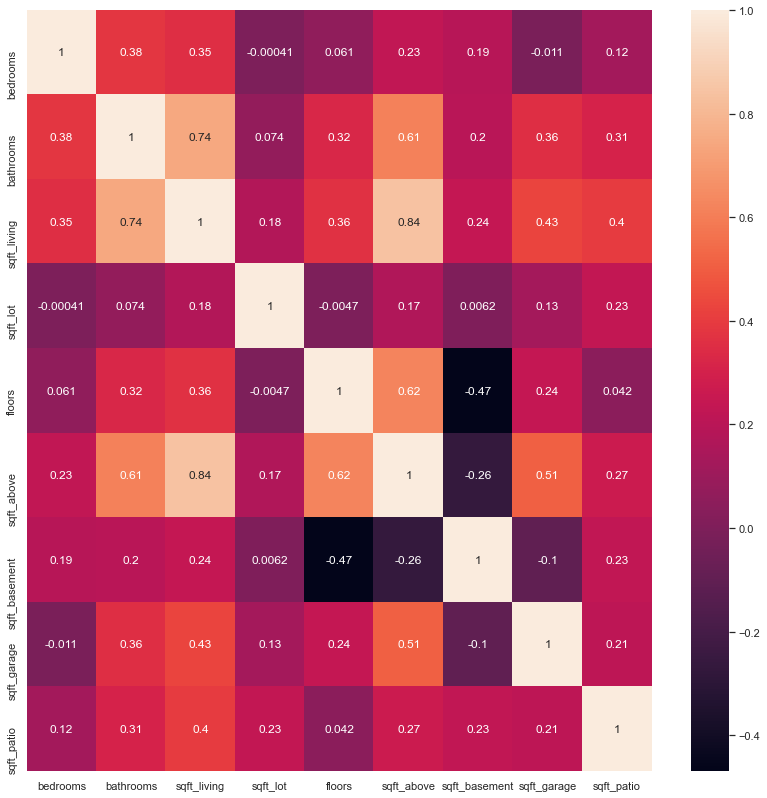

In [60]:
#Heatmap for Collinearity
sns.set(rc={'figure.figsize':(14, 14)})
sns.heatmap(X_train_numeric.corr(),annot=True);

In [61]:
#Test Data

In [62]:
# X_test_numeric = X_test['Column 1', 'Column 2']

### Discrete X/ Predictive Variables

#### Discrete Ordinal X/ Predictive Variables

In [63]:
#Separate Discrete Ordinal X Variables from rest of X Variables

In [64]:
from sklearn.preprocessing import OrdinalEncoder

In [65]:
#Train Data

In [66]:
ord_cat_selector = ['condition','grade']
X_train_ord_cat_subset = X_train[ord_cat_selector]
# X_train_ord_cat_subset #Uncomment to view

In [67]:
X_train_ord_cat_subset['condition'].unique()

array(['Average', 'Good', 'Very Good', 'Fair', 'Poor'], dtype=object)

In [68]:
X_train_ord_cat_subset['grade'].unique()

array(['7 Average', '9 Better', '8 Good', '11 Excellent', '10 Very Good',
       '6 Low Average', '12 Luxury', '5 Fair', '13 Mansion', '3 Poor'],
      dtype=object)

In [69]:
# REPLACE WITH COLUMN'S UNIQUE VALUES IN ASCENDING ORDER --->
condition_list = ['Poor', 'Fair', 'Average', 'Good', 'Very Good'] 
grade_list = ['3 Poor', '5 Fair', '6 Low Average', '7 Average','8 Good','9 Better','10 Very Good','11 Excellent',\
             '12 Luxury','13 Mansion']

In [70]:
o_enc = OrdinalEncoder(categories = [condition_list, grade_list])
o_enc.fit(X_train_ord_cat_subset)

OrdinalEncoder(categories=[['Poor', 'Fair', 'Average', 'Good', 'Very Good'],
                           ['3 Poor', '5 Fair', '6 Low Average', '7 Average',
                            '8 Good', '9 Better', '10 Very Good',
                            '11 Excellent', '12 Luxury', '13 Mansion']])

In [71]:
o_enc.transform(X_train_ord_cat_subset)

array([[2., 3.],
       [2., 5.],
       [2., 3.],
       ...,
       [3., 4.],
       [2., 3.],
       [2., 5.]])

In [72]:
X_train_ord = pd.DataFrame(o_enc.transform(X_train_ord_cat_subset),
                        columns = X_train_ord_cat_subset.columns)

In [73]:
X_train_ord.head()

,condition,grade
0,2.0,3.0
1,2.0,5.0
2,2.0,3.0
3,3.0,3.0
4,3.0,4.0


In [74]:
#Test Data

#### Discrete Nominal  X/ Predictive Variables

In [75]:
#Separate Discrete Nominal X Variables from rest of X Variables

In [76]:
from sklearn.preprocessing import OneHotEncoder
onehot_enc = OneHotEncoder(drop = 'first', sparse = False)

In [77]:
#Train Data

In [78]:
nominal_cols = ['waterfront','greenbelt','view','heat_source','sewer_system','yr_built','Zip Code',\
                'DistrictName']
onehot_enc.fit_transform(X_train[nominal_cols])

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [79]:
X_train_nom_trans = onehot_enc.fit_transform(X_train[nominal_cols])
X_train_nom_trans.shape

(8663, 229)

In [80]:
cols = onehot_enc.get_feature_names()

In [81]:
X_train_nom = pd.DataFrame(X_train_nom_trans, columns = cols)
X_train_nom.head()

,x0_YES,x1_YES,x2_EXCELLENT,x2_FAIR,x2_GOOD,x2_NONE,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other,x4_PRIVATE RESTRICTED,x4_PUBLIC,x4_PUBLIC RESTRICTED,x5_1901.0,x5_1902.0,x5_1903.0,x5_1904.0,x5_1905.0,x5_1906.0,x5_1907.0,x5_1908.0,x5_1909.0,x5_1910.0,x5_1911.0,x5_1912.0,x5_1913.0,x5_1914.0,x5_1915.0,x5_1916.0,x5_1917.0,x5_1918.0,x5_1919.0,x5_1920.0,x5_1921.0,x5_1922.0,x5_1923.0,x5_1924.0,x5_1925.0,x5_1926.0,x5_1927.0,x5_1928.0,x5_1929.0,x5_1930.0,x5_1931.0,x5_1932.0,x5_1933.0,x5_1934.0,x5_1935.0,x5_1936.0,x5_1937.0,x5_1938.0,x5_1939.0,x5_1940.0,x5_1941.0,x5_1942.0,x5_1943.0,x5_1944.0,x5_1945.0,x5_1946.0,x5_1947.0,x5_1948.0,x5_1949.0,x5_1950.0,x5_1951.0,x5_1952.0,x5_1953.0,x5_1954.0,x5_1955.0,x5_1956.0,x5_1957.0,x5_1958.0,x5_1959.0,x5_1960.0,x5_1961.0,x5_1962.0,x5_1963.0,x5_1964.0,x5_1965.0,x5_1966.0,x5_1967.0,x5_1968.0,x5_1969.0,x5_1970.0,x5_1971.0,x5_1972.0,x5_1973.0,x5_1974.0,x5_1975.0,x5_1976.0,x5_1977.0,x5_1978.0,x5_1979.0,x5_1980.0,x5_1981.0,x5_1982.0,x5_1983.0,x5_1984.0,x5_1985.0,x5_1986.0,x5_1987.0,x5_1988.0,x5_1989.0,x5_1990.0,x5_1991.0,x5_1992.0,x5_1993.0,x5_1994.0,x5_1995.0,x5_1996.0,x5_1997.0,x5_1998.0,x5_1999.0,x5_2000.0,x5_2001.0,x5_2002.0,x5_2003.0,x5_2004.0,x5_2005.0,x5_2006.0,x5_2007.0,x5_2008.0,x5_2009.0,x5_2010.0,x5_2011.0,x5_2012.0,x5_2013.0,x5_2014.0,x5_2015.0,x5_2016.0,x5_2017.0,x5_2018.0,x5_2019.0,x5_2020.0,x5_2021.0,x5_2022.0,x6_98002,x6_98003,x6_98004,x6_98005,x6_98006,x6_98007,x6_98008,x6_98010,x6_98011,x6_98014,x6_98019,x6_98022,x6_98023,x6_98024,x6_98027,x6_98028,x6_98029,x6_98030,x6_98031,x6_98032,x6_98033,x6_98034,x6_98038,x6_98039,x6_98040,x6_98042,x6_98045,x6_98047,x6_98050,x6_98051,x6_98052,x6_98053,x6_98055,x6_98056,x6_98057,x6_98058,x6_98059,x6_98065,x6_98070,x6_98072,x6_98074,x6_98075,x6_98077,x6_98092,x6_98102,x6_98103,x6_98105,x6_98106,x6_98107,x6_98108,x6_98109,x6_98112,x6_98115,x6_98116,x6_98117,x6_98118,x6_98119,x6_98122,x6_98125,x6_98126,x6_98133,x6_98136,x6_98144,x6_98146,x6_98148,x6_98155,x6_98166,x6_98168,x6_98177,x6_98178,x6_98188,x6_98198,x6_98199,x6_98288,x6_98354,x7_Bellevue School District,x7_Enumclaw School District,x7_Federal Way School District,x7_Fife School District,x7_Highline School District,x7_Issaquah School District,x7_Mercer Island School District,x7_Northshore School District,x7_Renton School District,x7_Riverview School District,x7_Seattle School District No. 1,x7_Shoreline School District,x7_Skykomish School District,x7_Snoqualmie Valley School District,x7_Tahoma School District,x7_Tukwila School District,x7_Vashon Island School District
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

In [82]:
#Test Data

In [83]:
# nominal_cols = ['Column 1','Column 2']
# onehot_enc.transform(X_test[nominal_cols])

### Combine Discrete/Categorical X/ Predictive Variables

In [84]:
#Train Data

In [85]:
X_train_cat = pd.concat([X_train_ord, X_train_nom],axis = 1)
X_train_cat

,condition,grade,x0_YES,x1_YES,x2_EXCELLENT,x2_FAIR,x2_GOOD,x2_NONE,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other,x4_PRIVATE RESTRICTED,x4_PUBLIC,x4_PUBLIC RESTRICTED,x5_1901.0,x5_1902.0,x5_1903.0,x5_1904.0,x5_1905.0,x5_1906.0,x5_1907.0,x5_1908.0,x5_1909.0,x5_1910.0,x5_1911.0,x5_1912.0,x5_1913.0,x5_1914.0,x5_1915.0,x5_1916.0,x5_1917.0,x5_1918.0,x5_1919.0,x5_1920.0,x5_1921.0,x5_1922.0,x5_1923.0,x5_1924.0,x5_1925.0,x5_1926.0,x5_1927.0,x5_1928.0,x5_1929.0,x5_1930.0,x5_1931.0,x5_1932.0,x5_1933.0,x5_1934.0,x5_1935.0,x5_1936.0,x5_1937.0,x5_1938.0,x5_1939.0,x5_1940.0,x5_1941.0,x5_1942.0,x5_1943.0,x5_1944.0,x5_1945.0,x5_1946.0,x5_1947.0,x5_1948.0,x5_1949.0,x5_1950.0,x5_1951.0,x5_1952.0,x5_1953.0,x5_1954.0,x5_1955.0,x5_1956.0,x5_1957.0,x5_1958.0,x5_1959.0,x5_1960.0,x5_1961.0,x5_1962.0,x5_1963.0,x5_1964.0,x5_1965.0,x5_1966.0,x5_1967.0,x5_1968.0,x5_1969.0,x5_1970.0,x5_1971.0,x5_1972.0,x5_1973.0,x5_1974.0,x5_1975.0,x5_1976.0,x5_1977.0,x5_1978.0,x5_1979.0,x5_1980.0,x5_1981.0,x5_1982.0,x5_1983.0,x5_1984.0,x5_1985.0,x5_1986.0,x5_1987.0,x5_1988.0,x5_1989.0,x5_1990.0,x5_1991.0,x5_1992.0,x5_1993.0,x5_1994.0,x5_1995.0,x5_1996.0,x5_1997.0,x5_1998.0,x5_1999.0,x5_2000.0,x5_2001.0,x5_2002.0,x5_2003.0,x5_2004.0,x5_2005.0,x5_2006.0,x5_2007.0,x5_2008.0,x5_2009.0,x5_2010.0,x5_2011.0,x5_2012.0,x5_2013.0,x5_2014.0,x5_2015.0,x5_2016.0,x5_2017.0,x5_2018.0,x5_2019.0,x5_2020.0,x5_2021.0,x5_2022.0,x6_98002,x6_98003,x6_98004,x6_98005,x6_98006,x6_98007,x6_98008,x6_98010,x6_98011,x6_98014,x6_98019,x6_98022,x6_98023,x6_98024,x6_98027,x6_98028,x6_98029,x6_98030,x6_98031,x6_98032,x6_98033,x6_98034,x6_98038,x6_98039,x6_98040,x6_98042,x6_98045,x6_98047,x6_98050,x6_98051,x6_98052,x6_98053,x6_98055,x6_98056,x6_98057,x6_98058,x6_98059,x6_98065,x6_98070,x6_98072,x6_98074,x6_98075,x6_98077,x6_98092,x6_98102,x6_98103,x6_98105,x6_98106,x6_98107,x6_98108,x6_98109,x6_98112,x6_98115,x6_98116,x6_98117,x6_98118,x6_98119,x6_98122,x6_98125,x6_98126,x6_98133,x6_98136,x6_98144,x6_98146,x6_98148,x6_98155,x6_98166,x6_98168,x6_98177,x6_98178,x6_98188,x6_98198,x6_98199,x6_98288,x6_98354,x7_Bellevue School District,x7_Enumclaw School District,x7_Federal Way School District,x7_Fife School District,x7_Highline School District,x7_Issaquah School District,x7_Mercer Island School District,x7_Northshore School District,x7_Renton School District,x7_Riverview School District,x7_Seattle School District No. 1,x7_Shoreline School District,x7_Skykomish School District,x7_Snoqualmie Valley School District,x7_Tahoma School District,x7_Tukwila School District,x7_Vashon Island School District
0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0

In [86]:
#Test Data

In [87]:
# X_test_cat_df = pd.concat([X_test_ord, X_test_nom],axis = 1)

### Combine Continuous and Discrete X/ Predictive Variables

In [88]:
#Train Data - Combine all processed X Variables
X_process_train = pd.concat([X_train_numeric,X_train_cat],axis = 1)

In [89]:
X_process_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement,sqft_garage,sqft_patio,condition,grade,x0_YES,x1_YES,x2_EXCELLENT,x2_FAIR,x2_GOOD,x2_NONE,x3_Electricity/Solar,x3_Gas,x3_Gas/Solar,x3_Oil,x3_Oil/Solar,x3_Other,x4_PRIVATE RESTRICTED,x4_PUBLIC,x4_PUBLIC RESTRICTED,x5_1901.0,x5_1902.0,x5_1903.0,x5_1904.0,x5_1905.0,x5_1906.0,x5_1907.0,x5_1908.0,x5_1909.0,x5_1910.0,x5_1911.0,x5_1912.0,x5_1913.0,x5_1914.0,x5_1915.0,x5_1916.0,x5_1917.0,x5_1918.0,x5_1919.0,x5_1920.0,x5_1921.0,x5_1922.0,x5_1923.0,x5_1924.0,x5_1925.0,x5_1926.0,x5_1927.0,x5_1928.0,x5_1929.0,x5_1930.0,x5_1931.0,x5_1932.0,x5_1933.0,x5_1934.0,x5_1935.0,x5_1936.0,x5_1937.0,x5_1938.0,x5_1939.0,x5_1940.0,x5_1941.0,x5_1942.0,x5_1943.0,x5_1944.0,x5_1945.0,x5_1946.0,x5_1947.0,x5_1948.0,x5_1949.0,x5_1950.0,x5_1951.0,x5_1952.0,x5_1953.0,x5_1954.0,x5_1955.0,x5_1956.0,x5_1957.0,x5_1958.0,x5_1959.0,x5_1960.0,x5_1961.0,x5_1962.0,x5_1963.0,x5_1964.0,x5_1965.0,x5_1966.0,x5_1967.0,x5_1968.0,x5_1969.0,x5_1970.0,x5_1971.0,x5_1972.0,x5_1973.0,x5_1974.0,x5_1975.0,x5_1976.0,x5_1977.0,x5_1978.0,x5_1979.0,x5_1980.0,x5_1981.0,x5_1982.0,x5_1983.0,x5_1984.0,x5_1985.0,x5_1986.0,x5_1987.0,x5_1988.0,x5_1989.0,x5_1990.0,x5_1991.0,x5_1992.0,x5_1993.0,x5_1994.0,x5_1995.0,x5_1996.0,x5_1997.0,x5_1998.0,x5_1999.0,x5_2000.0,x5_2001.0,x5_2002.0,x5_2003.0,x5_2004.0,x5_2005.0,x5_2006.0,x5_2007.0,x5_2008.0,x5_2009.0,x5_2010.0,x5_2011.0,x5_2012.0,x5_2013.0,x5_2014.0,x5_2015.0,x5_2016.0,x5_2017.0,x5_2018.0,x5_2019.0,x5_2020.0,x5_2021.0,x5_2022.0,x6_98002,x6_98003,x6_98004,x6_98005,x6_98006,x6_98007,x6_98008,x6_98010,x6_98011,x6_98014,x6_98019,x6_98022,x6_98023,x6_98024,x6_98027,x6_98028,x6_98029,x6_98030,x6_98031,x6_98032,x6_98033,x6_98034,x6_98038,x6_98039,x6_98040,x6_98042,x6_98045,x6_98047,x6_98050,x6_98051,x6_98052,x6_98053,x6_98055,x6_98056,x6_98057,x6_98058,x6_98059,x6_98065,x6_98070,x6_98072,x6_98074,x6_98075,x6_98077,x6_98092,x6_98102,x6_98103,x6_98105,x6_98106,x6_98107,x6_98108,x6_98109,x6_98112,x6_98115,x6_98116,x6_98117,x6_98118,x6_98119,x6_98122,x6_98125,x6_98126,x6_98133,x6_98136,x6_98144,x6_98146,x6_98148,x6_98155,x6_98166,x6_98168,x6_98177,x6_98178,x6_98188,x6_98198,x6_98199,x6_98288,x6_98354,x7_Bellevue School District,x7_Enumclaw School District,x7_Federal Way School District,x7_Fife School District,x7_Highline School District,x7_Issaquah School District,x7_Mercer Island School District,x7_Northshore School District,x7_Renton School District,x7_Riverview School District,x7_Seattle School District No. 1,x7_Shoreline School District,x7_Skykomish School District,x7_Snoqualmie Valley School District,x7_Tahoma School District,x7_Tukwila School District,x7_Vashon Island School District
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,4.0,3.0,2130.0,7649.0,1.0,1130.0,1100.0,440.0,280.0,2.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,

In [90]:
X_process_train.shape

(10399, 240)

In [91]:
#Test Data - Combine all processed X Variables
# X_process_test

#### Scale the Data

In [92]:
# Let's create (instantiate) a StandardScaler object to scale our data for us.
from sklearn.preprocessing import StandardScaler

In [93]:
# Now we'll apply it to our data by using the .fit() (calculates stds and means) and .transform() methods.

#Train Data
ss.fit(X_process_train)
X_standard_process_train = ss.transform(X_process_train)

#Test Data
X_standard_process_test = ss.transform(X_process_test)

NameError: name 'ss' is not defined

#### Creating, Fitting, and Running the Model

In [ ]:
# Instantiate model
lr_simple_model = LinearRegression()

# Fit model
result = lr_simple_model.fit(X_standard_process_train.values.reshape(-1,1), y_train)

In [ ]:
# Retrieve estimated slope coefficient
result.coef_

In [ ]:
# Retrieve estimated y-intercept coefficient
result.intercept_

In [ ]:
#GIVES US OUR R**2
lr.score(X_standard_process_train, y_train)

In [ ]:
#These are our predictions - USE TEST DATA
y_hat = lr.predict(X_standard_process_test)
y_hat

#### Iterate Models

In [ ]:
#Maybe use Recursive Feature Elimination (RFE)

#### Evaluate Final Model Performance

##### Observing Residuals

In [ ]:
y_hat = lr.predict(X_standard_process_test)
resid = (y_train - y_hat)

fig, ax = plt.subplots()
ax.scatter(x=range(y_hat.shape[0]),y=resid, alpha=0.1);

#### Sklearn Metrics

In [ ]:
import sklearn.metrics as metrics

In [ ]:
#Uses different parameters than lr.score(Pred/X Variables, Target/Y Variable)

metrics.r2_score(y_train, y_hat) #lr.predict(preds_st_scaled))

In [ ]:
#MEAN ABSOLUTE ERROR
metrics.mean_absolute_error(y_train, lr.predict(X_standard_process_test))

In [ ]:
#ROOT MEAN SQUARED ERROR
metrics.mean_squared_error(y_train, lr.predict(X_standard_process_test), squared = False)